MODULE 3 | LESSON 1


---

# **Portfolio Returns and Variance**

|  |  |
|:---|:---|
|**Reading Time** | 2h  |
|**Prior Knowledge** | python, returns, variance, diversification  |
|**Keywords** | returns, logarithm, percent, matrix notation, distribution, annualize, geometric mean, arithmetic mean, portfolio variance, correlation, weights|

---

*In this lesson, we'll explore various types of returns, methods for annualizing returns, and techniques for calculating portfolio variance. The lesson aims to provide a comprehensive understanding of how to measure and interpret portfolio performance, considering both returns and risk.*

*We'll start by examining different types of returns, including percentage and logarithmic returns, and discuss their properties and appropriate use cases. We'll then move on to methods for annualizing returns, which is crucial for comparing investments over different time periods. The lesson will also cover portfolio variance calculation, exploring how individual asset variances, weights, and correlations contribute to overall portfolio risk.*

## **1. Portfolio Returns**

In Financial Markets, you were introduced to asset and portfolio returns. In Financial Data, we will explore both one-dimensional and multi-dimensional datasets. Therefore, matrix representations in linear algebra will be the main gateway for dealing with this subject. This makes sense because a portfolio consists of $n$ assets with returns $r_{i}, i \in \{1,n\}$ that can be arranged in a matrix $r$ where each column is represented by an asset. In this context, $r_{i}$ are vectors, and **in the absence of perfect multicollinearity**, it is true that $\text{dim}(\text{span}(r_{i})) = n$.

We have already seen that the portfolio returns are:
$$
r_{p} = \sum_{1}^{n} w_{i} \cdot r_{i}
$$
where
* $r_{p}$: portfolio returns
* $r_{i}$: asset $i$ returns
* $w_{i}$: the weight of asset $i$

We should have an additional constraint in mind:
$$
\sum_{1}^{n} w_{i} = 1
$$

and for the purposes of this lesson, we will also assume that shorting is not allowed:
$$
w_{i} > 0
$$

Essentially, the return of the portfolio $r_{p}$ is a linear combination of the returns of each asset. By construction, we have that $r_{p} \in \text{span}(r_{i})$ for every combination of the weights. That means that the assets that an investor chooses are the basis (in a Linear Algebra context) of the portfolio.

Let's now write the portfolio returns in the format we will be using for the rest of the lesson and make the notation clear:

$$
r_{p} = \mathbf{r} \cdot \mathbf{w}
$$

with
$$ \mathbf{r} = \begin{bmatrix} r_1 & r_2 & \dots & r_n \end{bmatrix} \text{ , } \mathbf{w} = \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_n \end{bmatrix}$$

and each $r_{i}$ is a vector that represents the returns of each asset across time $t$:
$$
r_{i} = \begin{bmatrix} r^i_{t_{1}} \\ r^i_{t_{2}} \\ \vdots \\ r^i_{t_{m}} \end{bmatrix}
$$



Using $1$ as the sum of all weights has an intuitive explanation: we construct the portfolio by using a percentage of each asset (the weights) until we use the entire amount ($1$ means $100\%$). What does it mean if we break that constraint?


**Exercise 1:**

Use your favorite finance textbook and online resources in researching the constraint $\sum_{1}^{n} w_{i} = 1$. What would it mean for a portfolio if $\sum_{1}^{n} w_{i} = 2$ ? Answer the same question but now for $\sum_{1}^{n} w_{i} = 0$. Initiate a discussion in the forum explaining your understanding.

Let's download some real-world data:

In [22]:
!pip install --upgrade pip
!pip install curl_cffi -U
from curl_cffi import requests
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [21]:
session = requests.Session(impersonate="chrome")
# assets = ["MSFT", "AAPL", "AMZN", "TSLA", "GOOGL"] # Assets for portfolio
assets = 'MSFT'
w = np.array([0.1, 0.2, 0.1, 0.4, 0.2]) # Weights of each asset

asset_prices = yf.download('MSFT', start='2025-01-01', end='2025-06-01', auto_adjust = False, session=session)['Adj Close'] # Downloading daily data
# asset_prices.index = pd.to_datetime(asset_prices.index) # Setting index as datetime object

# r = asset_prices.pct_change().dropna() # Calculating daily percent returns

# r.head() # Each column is r_{i}

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MSFT']: AttributeError("'str' object has no attribute 'name'")


In [3]:
r_port = r @ w # Creating portfolio returns
r_port.name = 'portfolio_returns'
r_port.head()

Series([], Name: portfolio_returns, dtype: float64)

## **2 Types of Returns**

In the example above, we have essentially presented a way to calculate portfolio daily percent returns. But these returns are not the only ones used in practice:

### **2.1 Percentage Returns**

Percentage returns, also known as simple returns or arithmetic returns, are commonly used in practice:
$$
r_{t} = \frac{p_{t} - p_{t-1}}{p_{t-1}}
$$
where $p_{t}$ is the price of an asset at time $t$.

The biggest bonus of using these returns is that the interpretation is intuitive: they directly represent the percentage change in value. A drawback is that they are not additive across time for one asset even though, for the exact same reason they are commonly used with portfolios.

The implications of nonadditivity are simple to show: imagine that you have an asset of price $A$. The first month, the price appreciates by $20\%$, but at the end of the second month, the price falls by $18\%$. If the returns were additive, one could just add them $20\% - 18\% = 2\%$ and argue that the total return for the 2 months is $2\%$. But as we will see in a future section, that is not true.

Lastly, the simple returns are not symmetrical. There is no boundary to the upside, yet it is bounded on the downside. Intuitively, the returns of a share cannot be less than $-100\%$ since the price would become negative. On the upside though, the returns can go really high especially when dealing with large horizons. Another way to showcase this is with the following observation: the price of an asset in three consecutive months is 100 -> 120 -> 100. At the end of the second month, the returns are $20\%$, but at the end of the third month, they are $-16.6\%$. If the simple returns were symmetrical, then it would require the same absolute number of returns for going from 100 to 120 and then back to 100.

**Exercise 2:**

Create a custom function in Python that given a price array (for example `asset_prices['MSFT']`), will return the array of the arithmetic returns. You are not allowed to use any existing Python functions. Cross-check the results with the ones produced by using the `pct_change` pandas function.

### **2.2 Logarithmic Returns**

The log returns, also known as continuously compounded returns, make use of the natural logarithm in the following way:

$$
r_{t_\text{log}} = ln \left ( \frac{p_t}{p_{t-1}} \right )
$$

In contrast to the percent returns, the log returns are additive for one asset over time:
$$
r_{(t_{i}-t_{j})_{\text{log}}} = \sum_{t = i}^{t = j} r_{t_\text{log}}
$$
they are also assumed (not always correctly) to be normally distributed, which is an important assumption for many econometric and stochastic models.

The additivity is responsible for the name "continuously compounded returns" since now you can just calculate the total returns over large horizons simply by adding the intra-period log returns. This creates a problem though: if we have the individual logarithmic returns of several assets, does it make sense to use them in order to calculate the returns of the portfolio? If adding log returns is a compounding process, are you allowed to add log returns of different assets?

The answer to the above questions is **no** and one needs to take extra care in order to use the correct type of return for each use case.

Lastly, the log returns are symmetrical. Mathematically, we can see that:

$$
log \left ( \frac{p_{t}}{p_{t-1}} \right ) = - log \left ( \frac{p_{t-1}}{p_{t}} \right )
$$

By using the numbers of the above example, we can see that the log returns from 100 to 120 are equal (but negative sign) with the log returns of 120 to 100.

**Exercise 3:**

Create a custom function in Python that, given a price array (for example `asset_prices['MSFT']`), will return the array of the logarithmic returns.


As we have illustrated above, we can only distinguish between the two kinds of returns in terms of use cases. But now we need to be a bit more specific as to when and how. In order to do so, we need to do one observation:

In [4]:
print("The 25th quantile is: ", r['MSFT'].quantile(0.25),"\nThe 75th quantile is: ", r['MSFT'].quantile(0.75))

The 25th quantile is:  nan 
The 75th quantile is:  nan


The above results illustrate that, on many occasions, the daily returns are of the order of $1\%$. Additionally, for the logarithmic and the percentage returns, it is true that:
$$
r_{\text{log}} = ln \left ( \frac{p_{t}}{p_{t-1}} \right ) =
ln \left ( \frac{p_{t} - p_{t-1} + p_{t-1}}{p_{t-1}} \right ) =
ln (1 + r_{\text{pct}})
$$

By using the Taylor expansion on the formula above, we get:
$$
r_{\text{log}} = ln (1 + r_{\text{pct}}) = r_{\text{pct}} - \frac{r_{\text{pct}}^2}{2} + \frac{r_{\text{pct}}^3}{3} - \frac{r_{\text{pct}}^4}{4} + \dots
$$

Since we observed that the daily returns are small $< 0.01$, we can assume that the higher terms ($r_{\text{pct}}^3$ and above ) will be very small:

$$
r_{\text{log}} = r_{\text{pct}} - \frac{r_{\text{pct}}^2}{2} + O(R^3)
$$

By taking the expectation of both parts in the formula above and performing algebraic calculations, we have that:

$$
\mathbb{E}(r_{\text{log}}) \approx \mathbb{E}(r_{\text{pct}}) - \frac{\sigma^2}{2}
$$
where $\sigma$ is the variance of the percent returns.

The above result illustrates two important facts:
1. When volatility is low, we expect that the log returns and percent returns will be very close (Ruppert and Matteson).
2. When the sampling frequency gets lower, the log and percent returns tend to get larger in absolute values, and thus, volatility tends to get bigger as well. This results in divergence between the two returns.

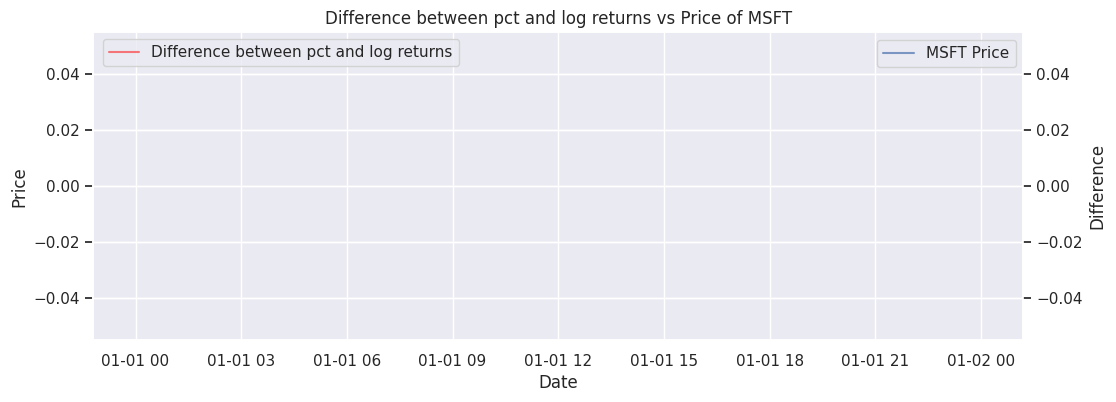

In [5]:
# Figure 1

pct_returns_msft = asset_prices['MSFT'].pct_change().dropna() # Calculating pct returns
log_returns_msft = np.log(asset_prices['MSFT'] / asset_prices['MSFT'].shift(1)).dropna() # Calculating log returns

pct_change_msft_roll_mean = pct_returns_msft.rolling(15).mean() # Rolling average of pct returns
log_returns_msft_roll_mean = log_returns_msft.rolling(15).mean() # Rolling average of log returns

fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Difference between pct and log returns vs Price of MSFT')
ax.plot(asset_prices['MSFT'], label = 'MSFT Price', alpha = 0.7)
ax.set_ylabel('Price')
ax.set_xlabel('Date')
ax.legend()

ax2 = ax.twinx()
ax2.plot((pct_change_msft_roll_mean - log_returns_msft_roll_mean), color = 'red', alpha = 0.5, label = 'Difference between pct and log returns')
ax2.set_ylabel('Difference')
ax2.legend(loc = (0.01,0.89))
plt.show()

Figure 1 illustrates the difference between the pct and log returns. During low vol periods, both returns are very close, whereas during the March 2020 market crash, this difference becomes pronounced.

**Exercise 4:**

MSFT is a low-volatility stock. Recreate Figure 1 but now use TSLA in order to illustrate clearly in which periods the two returns diverge.

**Exercise 5:**

Argue why calculating the arithmetic weighted mean of log returns of different assets at a specific period in time will not give you the portfolio returns at that period.

**Exercise 6:**

Using the provided `asset_prices` DataFrame, calculate the daily portfolio value by computing the weighted sum of the asset prices, using predetermined asset weights (as you would when calculating portfolio returns). Next, calculate the logarithmic returns of this portfolio value series. Discuss the potential use cases and advantages of using log returns in this context.

**Exercise 7:**

Using the provided `asset_prices` DataFrame, calculate the cumulative return of each asset over the entire period using three different methods:

1. By using the daily percent returns array of each asset (hint: you will need to use the `prod` function).
2. By using the daily log returns.
3. By using the asset prices array.

## **3. Comparing Geometric and Arithmetic Returns**

We will continue our discussion from Module 2 on how to annualize returns, but before delving into this subject, we will check a trivial example that illustrates the mean that should be used for each type of return, **if the compounding effect of returns is required**.

### **3.1 Geometric Mean Example**

Let's assume that at time $t_{0}$, you have 100 units. Between $t_{0}$ and $t_{1}$, your return was 20%, and between $t_{1}$ and $t_{2}$, it was -18%. We assume that $t_{i}$ are spaced evenly.

**Calculating the Arithmetic Mean**

The arithmetic mean of the returns is:

$$
r_{\text{mean}} = \frac{0.2 - 0.18}{2} = 0.01
$$

This suggests that, on average, the return for each period is +1%. Following this logic, in the first period, we would have earned:

$$
100 \cdot 0.01 = 1 \text{ unit }
$$

So, at the end of the first period, we would have 101 units. During the second period, assuming the same +1% return:

$$
101 \cdot 0.01 = 1.01 \text{ units }
$$

This implies that at the end of the second period, we would have:

$$
100 + 2.01 = 102.01 \text{ units in total.}
$$

**Using the Actual Returns**

Now, let’s follow a different approach by applying the actual returns sequentially.

1. At the end of $t_{1}$, with a 20% return on 100 units:

$$
100 \cdot 0.2 = 20 \text{ units earned.}
$$

   So, you have 120 units at the end of $t_{1}$.

2. During the second period, from $t_{1}$ to $t_{2}$, the return is -18%. Starting with 120 units:

$$
120 \times 0.18 = 21.6 \text{ units lost.}
$$

   So, at the end of $t_{2}$, you end up with:

$$
120 - 21.6 = 98.4 \text{ units.}
$$

**Which Method Is Correct?**

Let’s calculate the geometric mean return to see which method aligns with reality:

$$
r_{\text{GeomMean}} = \left(\prod _{i=1}^{n} (1 + r_{i}) \right)^{\frac {1}{n}} - 1
$$

For our two periods:

$$
r_{\text{GeomMean}} = \left( (1 + 0.2) \cdot (1 - 0.18) \right)^{\frac{1}{2}} - 1 = \sqrt{1.2 \cdot 0.82} - 1 \approx 0.992 - 1 = -0.008
$$

Now let’s test this geometric mean to see if it reflects the actual ending value:

$$
100 \cdot (1 - 0.008) \cdot (1 - 0.008) \approx 100 \cdot 0.992 \cdot 0.992 = 98.4 \text{ units.}
$$


This example demonstrates the obvious: that the loss of 18% on 120 units is greater than the gain of 20% on 100 units, leading to an overall decrease in value. Therefore, despite the arithmetic mean suggesting a positive return of 1%, you actually lost money, as shown by the geometric mean. The geometric mean provides a more accurate representation of compounded returns over multiple periods, especially when returns are volatile.

That is of course when we deal with one asset across time and not when we deal with many assets at a specific point.

### **3.2 Arithmetic Mean**

We have established that we cannot use the arithmetic mean with percent returns for one asset across time **if compounding is important for our analysis** (unless volatility is really low as we have explained). So the question is, can we use the arithmetic mean with the logarithmic returns? Let's rewrite the example above using the logarithmic returns instead of the simple ones.

The log returns are:

$$
r_{\text{log}_1} = \log(1.2) \approx 0.1823, \quad r_{\text{log}_2} = \log(0.82) \approx -0.1987
$$

Because log returns are additive, we can aggregate the returns as:

$$
r_{\text{ArithMean}} = \frac{1}{2} \left ( r_{\text{log}_1} + r_{\text{log}_2} \right ) =\frac{1}{2} \left ( \log(1.2) + \log(0.82) \right )
$$

By the properties of logarithms:

$$
r_{\text{ArithMean}} = \frac{1}{2} \log(1.2 \cdot 0.82) \approx \log(0.984^{\frac{1}{2}}) \approx \log(0.992)
$$


Exponentiating this gives the actual compounded return:

$$
\exp(\log(0.992)) = 0.992
$$

This corresponds to the geometric mean, which correctly reflects the final value:

$$
100 \cdot 0.992 \cdot 0.992 \approx 98.4 \text{ units.}
$$

Thus, the arithmetic mean $r_{\text{ArithMean}}$ of log returns provides the *correct* average return, aligning with the actual compounding of returns.


**Exercise 8:**

By using the properties of the logarithm, show that the log returns are indeed continuously compounded returns. (Hint: $r^{t_{1}}_{\text{log}} + r^{t_{2}}_{\text{log}} + r^{t_{3}}_{\text{log}} + \dots = ln \left ( \frac{p_{t_{2}}}{p_{t_{1}}} \right ) + ln \left ( \frac{p_{t_{3}}}{p_{t_{2}}} \right ) + \dots$). Show that:

$$
ln(r_{\text{GeomMean}} + 1) = \frac{1}{n}\sum_{t=1}^{t=n} r^{t}_{\text{log}}
$$

Let's verify Exercise 8 using real-world data:


In [6]:
percent_returns_tsla = asset_prices['TSLA'].loc["2020-06-01":"2020-09-30"].pct_change().dropna() # Calculating daily percent returns
geom_mean_tsla_1 = ((1 + percent_returns_tsla).prod() ** (1/len(percent_returns_tsla))) - 1 # Calculating geometric mean

log_returns_tsla = np.log(asset_prices['TSLA'].loc["2020-06-01":"2020-09-30"] / asset_prices['TSLA'].loc["2020-06-01":"2020-09-30"].shift(1)).dropna() # Calculating daily log returns
arithmetic_mean_tsla_1 = log_returns_tsla.mean() # Calculating arithmetic mean

print("Logarithm of geometric Mean of TSLA + 1: ", np.log(geom_mean_tsla_1 + 1))
print("Arithmetic Mean of TSLA: ", arithmetic_mean_tsla_1)

ZeroDivisionError: division by zero

### **3.3 Choosing the Correct Mean for Percent Returns**

When analyzing investment returns, it's essential to choose the ppropriate mean based on the context. The arithmetic mean is **the correct measure for calculating expected returns in statistical models and portfolio optimization**. It represents the average return per period without considering the compounding effect. This is crucial when forecasting future returns, calculating expected portfolio returns, and performing risk assessments, as it aligns with the linear properties required in these calculations.

On the other hand, the geometric mean accurately reflects the average compounded growth rate over multiple periods. It accounts for the effects of compounding and is suitable for evaluating the historical performance of an investment over time. However, the geometric mean should not be used in place of the arithmetic mean when performing statistical analyses or modeling expected returns, as it does not provide an unbiased estimate of future performance.

In summary, while the geometric mean is invaluable for understanding the actual growth of an investment due to compounding, the arithmetic mean remains the fundamental measure in statistical contexts and portfolio management when assessing expected returns and making investment decisions.

## **4. Annualizing Percent Returns**

The above (trivial in many cases) examples were used to create the intuition that you will need to distinguish between annualizing logarithmic and percent returns. Annualizing returns is crucial since it allows us to compare investments over different time periods on a common annual basis. This process is essential for evaluating performance and comparing different assets.

For percent returns, we use the geometric mean to account for compounding effects. The formula for annualizing daily percent returns is:

$$
R_{\text{Annual}} = (1 + r_{\text{GeomMean}})^N - 1
$$

Where:

* $R_{\text{Annual}}$ is the annualized return
* $N$ is the number of trading periods in a year (it could be 252 days or 12 months for stocks, or 365 days for continuously traded assets, etc.)

## **5. Annualizing Logarithmic Returns**

For logarithmic returns, the annualization process is simpler due to their additive property. The formula for annualizing daily log returns is:

$$
R_{\text{Annual,Log}} = N \cdot r_{\text{ArithMean}}
$$

If we want to convert it back to the "actual" annual returns, then:

$$
R_{\text{Annual}} = e^{N \cdot r_{\text{ArithMean}}} - 1
$$

Let's calculate the annual returns of MSFT.

In [ ]:
geom_mean_msft = ((1 + pct_returns_msft).prod() ** (1/len(pct_returns_msft))) - 1 # Calculating geometric mean
annual_pct_returns_msft = (1 + geom_mean_msft) ** 252 - 1 # Annualizing percent returns

annual_log_returns_msft = log_returns_msft.mean() * 252 # Annualizing log returns

print("Annualized pct returns of MSFT: ", annual_pct_returns_msft)
print("Annualized log returns of MSFT: ", annual_log_returns_msft)

**Exercise 9:**

Calculate the annual returns for TSLA, both for percent and log returns.

## **6. Portfolio Variance**

### **6.1 Overview of Portfolio Variance**

This was discussed at a high level during the Financial Markets course, but here, we will show how to calculate variance in Python with empirical data. While returns are important, investors are also concerned about risk or volatility.  

But let's think for a moment how we could measure risk for a portfolio of $n$ assets. If we had one asset, then we could calculate the standard deviation of returns and this could give us an approximation of how the returns deviate from the mean return. Similarly, one can argue that we can calculate the portfolio returns and then the standard deviation.

In [ ]:
r_port.std() # Calculating standard deviation of portfolio returns

In Financial Markets, we also expressed portfolio variance as:

$$
\sigma^{2}_{p} = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j \text{Cov}(r_i, r_j)
$$

Where:

* $w_i$ = the portfolio weight of the $i$th asset  
* $\text{Cov}_{i,j}$ = the covariance of two assets, which can be expressed as $\rho_{_{(i,j)}} \sigma_i \sigma_j$, where $\rho_{_{(i,j)}}$ is the correlation coefficient between the two assets


The formula below is equivalent to the one above, but it is given in matrix notation:

$$
\sigma^{2}_{p} = \mathbf{w}^{T} \cdot \Sigma \cdot \mathbf{w}
$$

Where $\Sigma$ is the portfolio covariance matrix.

In [ ]:
port_var = w.T @ r.cov() @ w # Calculating portfolio variance
port_std = np.sqrt(port_var) # Calculating portfolio standard deviation

print("Portfolio variance: ", port_var)
print("Portfolio standard deviation: ", port_std)

In the above cell, we have showcased that the intuitive and straightforward way of calculating portfolio variance (by computing std directly on the portfolio value) can be replicated by using the covariance matrix and the weights. What we have essentially done is decompose the portfolio variance into several components:
* The weights
* The individual variances
* The between pairs covariances

The above result is somewhat anticipated. If the variance of an asset suddenly changes, the portfolio variance should change. If the weight of a high variance asset changes, then we expect that the portfolio variance will change accordingly. But what about covariances?

In order to see more clearly, we will decompose the covariance matrix a bit more:

$$
\Sigma = D \cdot R \cdot D
$$

where

* D is a diagonal matrix with the standard deviations of each asset
* R is the correlation matrix

The last decomposition shows us that the portfolio variance depends on the pairwise (Pearson) correlations as well.

### **6.2 Impact of Correlation on Portfolio Variance**

Let's write the portfolio variance in its quadratic form but incorporating correlations instead of covariances:

$$
\sigma_p^2 = \sum_{i=1}^{n} w_i^2 \sigma_i^2 + \sum_{i=1}^{n}\sum_{j \neq i}^{n} w_i w_j \sigma_{ij}
$$

By substituting $\sigma_{ij} = \rho_{ij} \sigma_i \sigma_j$, we have:

$$
\sigma_p^2 = \sum_{i=1}^{n} w_i^2 \sigma_i^2 + \sum_{i=1}^{n}\sum_{j \neq i}^{n} w_i w_j \rho_{ij} \sigma_i \sigma_j
$$


To understand how the portfolio variance changes with respect to the correlation $\rho_{ij}$, we will take the partial derivative of $\sigma_p^2$ with respect to $\rho_{ij}$:

$$
\frac{\partial \sigma_p^2}{\partial \rho_{ij}} = \frac{\partial}{\partial \rho_{ij}} \left( \sum_{i=1}^{n} w_i^2 \sigma_i^2 + \sum_{i=1}^{n}\sum_{j \neq i}^{n} w_i w_j \rho_{ij} \sigma_i \sigma_j \right)
$$

The first sum is independent of $\rho_{ij}$, so its derivative with respect to $\rho_{ij}$ is zero. The derivative of the second sum, with respect to $\rho_{ij}$, gives:

$$
\frac{\partial \sigma_p^2}{\partial \rho_{ij}} = w_i w_j \sigma_i \sigma_j
$$

We have already assumed that $w_{i} > 0$ and we know that standard deviations are always positive. That means that:

$$
\frac{\partial \sigma_p^2}{\partial \rho_{ij}} > 0
$$

Keeping all else the same, if the correlations between two assets increases/decreases, the portfolio variance will increase/decrease. Subsequently, if the correlations of many assets increase at the same time, the portfolio variance will increase faster, and that could be an indication of systemic risk.

Let's showcase some of the above facts with real-world data:

In [ ]:
# Figure 2
# We will visualize the asset's std and returns vs portfolio

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,4))

ax1.bar(x = r.columns, height = r.std(), alpha = 0.7)
ax1.hlines(y = port_std, xmin = -0.4, xmax = 4.4, linestyle = "--", color = 'red', alpha = 0.8, label = "Portfolio Std")
ax1.set_title("Assets vs Portfolio Volatlity")
ax1.set_ylabel("Volatility")
ax1.legend()

ax2.bar(x = r.columns, height = (r + 1).prod() - 1, alpha = 0.7) # Make sure you can explain why the `(r + 1).prod() - 1` is the total return
ax2.hlines(y = (r_port + 1).prod() - 1, xmin = -0.4, xmax = 4.4, linestyle = "--", color = 'red', alpha = 0.8, label = "Portfolio Total Returns")
ax2.set_title("Assets vs Portfolio Total Returns")
ax2.set_ylabel("Total Returns (* 100%)")
ax2.legend()

plt.show()

In Figure 2, the weights we selected (randomly) gave us a portfolio whose volatility is close to that of the majority of the assets, but its returns are well above.

Let's test the relationship of the portfolio variance with the one of a random asset, for example MSFT.

In [ ]:
# Figure 3
multipliers = np.linspace(0.1,5,100) # Creating an array that will use to multiply the MSFT returns array.
portfolio_variances = []
msft_variances = []

for multiplier in multipliers:
  temp_returns = r * np.array([1, 1, 1, multiplier, 1]) # Multiplying MSFT returns with a number in order to scale the returns linearly, changing thus the MSFT variance.
  temp_port_variance = w.T @ temp_returns.cov() @ w # Calculating portfolio variance
  msft_variances.append((temp_returns['MSFT'] * multiplier).var())
  portfolio_variances.append(temp_port_variance)
  assert np.allclose(r.corr(), temp_returns.corr()) # For every new array of returns where MSFT returns are multiplied with a number, the correlations remain the same

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,5))

ax1.plot(multipliers, portfolio_variances)
ax1.scatter(1, port_var, color = 'red', label = "Initial Portfolio Variance (non scaled MSFT returns)")
ax1.set_title("Portfolio Variance as MSFT variance is increasing")
ax1.set_xlabel("Multiplier")
ax1.set_ylabel("Variance")
ax1.legend()

ax2.plot(multipliers[10:30], portfolio_variances[10:30])
ax2.scatter(1, port_var, color = 'red', label = "Initial Portfolio Variance (non scaled MSFT returns)")
ax2.plot(multipliers[10:30], msft_variances[10:30], color = 'purple', label = "MSFT Variance (non scaled MSFT returns)")
ax2.set_title("Portfolio Variance vs MSFT variance")
ax2.set_xlabel("Multiplier")
ax2.set_ylabel("Variance")
ax2.legend()

plt.show()

Figure 3 illustrates the effects of the increase of the variance of one asset (MSFT in our case) on the variance of the portfolio. As we expect, the relationship of the portfolio variance and the variance of any asset is quadratic (left graph). The right graph illustrates the difference in risk of holding only one asset vs. a portfolio.

Let's now do the same but for correlations. For simplicity reasons, we will not simulate correlated assets (as you have already seen in Module 2 by using the Cholesky Decomposition), but we will merely create synthetic correlation matrices to show the effects of changing correlations in the portfolio variance.

In the next example, we keep variances and weights constant. We assume 100 assets for which we construct 18 correlation matrices. The 1st corr matrix is allowed to take values from -1 to 1. For each subsequent corr matrix, the low boundary changes as follows $-1 + 0.1 \cdot j$. That means that the 2nd corr matrix will have correlations from -0.9 to 1 and the 18th corr matrix from 0.8 to 1.

In [ ]:
n_assets = 100

w = np.random.dirichlet(np.ones(n_assets), size=1)[0] # Simulate weights using Dirichlet distribution

degrees_of_freedom = 8  # Adjust the skewness of the Chi-square distribution
variances = np.random.chisquare(df=degrees_of_freedom, size=n_assets)
variances = variances / np.max(variances) * 0.003  # Scale to max variance of 0.003
std_devs = np.sqrt(variances)
D = np.diag(std_devs)

# Construct the correlation matrices
corr_matrices = []
for j in range(19):
  R = np.zeros((n_assets, n_assets))
  low_boundary = -1 + j*0.1
  for i in range(1, n_assets):
      R[i, :i] = np.random.uniform(low_boundary, 1, i) # Creating the lower triangular part of the correlation matrix

  R = R + R.T # Comment this line yourself
  np.fill_diagonal(R, 1)
  corr_matrices.append(R)

# Calculate portfolio variances
portfolio_variances = []
for R in corr_matrices:
  portfolio_variance = w.T @ D @ R @ D @ w
  portfolio_variances.append(portfolio_variance)

# Plot portfolio variance against correlations
x_labels = [str((round(-1 + j*0.1, 1), 1)) for j in range(19)]
plt.figure(figsize = (10,5))
plt.plot(portfolio_variances)
plt.title("Portfolio Variance vs Correlation")
plt.xlabel("Correlation Interval")
plt.ylabel("Variance")
plt.xticks(ticks = range(19), labels = x_labels, rotation = 45)
plt.show()

Students who do not have a finance background may not have expected that result. Even when the individual variances and the weights remain constant, changes in correlations affect the portfolio variance. Specifically in our example, the portfolio variance is the lowest when the correlations were sampled from `uniform` distribution and interval $[-1,1]$. As the assets became more correlated, the variance went up as well.

**Exercise 10:**

Select $n \geq 2$ stocks/bonds and construct a portfolio (select appropriate weights) using historical data such that the portfolio variance is $0$ (or really close to $0$ in order to be considered $0$) and the returns are positive (far from $0$). Present your findings in the forum. If you did not find one, present the reasons you could not find one.

## **7. Portfolio Weights**

Assume we can construct a portfolio that consists of stocks, bonds, and crypto. An investor might choose to hold a lot of bonds while another chooses mostly stocks and a third one loves crypto. The choice has to do with the risk profile of the investor; in other words, the choice of weights will satisfy the needs for specific returns given a risk tolerance (variance).

From this perspective, the choice of weights is a subjective matter, and indeed in practice, investors behave very differently (Elton et al.). One of the best ways to explore this is by constructing the Efficient Frontier graph.

In [ ]:
from scipy.optimize import minimize

weights = np.random.dirichlet(np.ones(5)*0.7, size = 20000) # Creating 20000 sets of weights using dirichlet distribution

assert np.isclose(np.sum(weights, axis = 1), 1).all() # Check that each set of weights sum up to 1

eff_front_dict = {}
cov_matrix_ret = r.cov() * 252
expected_returns = r.mean() * 252

# Filling the eff_front_dict
for w in weights:
  port_ret = expected_returns @ w.T # Annualized percent returns as expected returns
  port_std = np.sqrt(w.T @ cov_matrix_ret @ w)
  eff_front_dict[str(list(w))] = [port_ret, port_std]

eff_frontier_dataframe = pd.DataFrame(eff_front_dict, index = ['Returns', 'Standard Deviation']).T # Storing everything in one dataframe

def get_portfolio_stats(weights, expected_returns, cov_matrix):
    port_ret = expected_returns @ weights
    port_std = np.sqrt(weights.T @ cov_matrix @ weights)
    return port_ret, port_std

def negative_sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate=0.02):
    port_ret, port_std = get_portfolio_stats(weights, expected_returns, cov_matrix)
    sharpe_ratio = (port_ret - risk_free_rate) / port_std
    return -sharpe_ratio

def minimum_variance(weights, expected_returns, cov_matrix):
    return get_portfolio_stats(weights, expected_returns, cov_matrix)[1]

def efficient_frontier_point(expected_returns, cov_matrix, target_return):
    n_assets = len(expected_returns)
    args = (expected_returns, cov_matrix)
    constraints = (
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
        {'type': 'eq', 'fun': lambda w: get_portfolio_stats(w, expected_returns, cov_matrix)[0] - target_return}
    )
    bounds = tuple((0, 1) for _ in range(n_assets))

    result = minimize(
        minimum_variance,
        x0=np.ones(n_assets) / n_assets,
        args=args,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )

    return result.x

def get_efficient_frontier(expected_returns, cov_matrix, n_points=100):
    # Find the minimum variance portfolio
    n_assets = len(expected_returns)
    args = (expected_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    bounds = tuple((0, 1) for _ in range(n_assets))

    min_var_result = minimize(
        minimum_variance,
        x0=np.ones(n_assets) / n_assets,
        args=args,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    min_ret, min_std = get_portfolio_stats(min_var_result.x, expected_returns, cov_matrix)

    # Find the maximum return portfolio
    max_ret_idx = np.argmax(expected_returns)
    max_ret = expected_returns[max_ret_idx]

    # Generate points on the efficient frontier
    target_returns = np.linspace(min_ret, max_ret, n_points)
    efficient_portfolios = []

    for target_return in target_returns:
        weights = efficient_frontier_point(expected_returns, cov_matrix, target_return)
        ret, std = get_portfolio_stats(weights, expected_returns, cov_matrix)
        efficient_portfolios.append([std, ret])

    return np.array(efficient_portfolios)

# Calculate the efficient frontier points
efficient_points = get_efficient_frontier(expected_returns, cov_matrix_ret)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(x=eff_frontier_dataframe['Standard Deviation'],
           y=eff_frontier_dataframe['Returns'],
           alpha=0.4)
plt.scatter(x=r.std() * np.sqrt(252),
           y=expected_returns,
           color='red',
           label="Individual Assets",
           alpha=0.7)
plt.plot(efficient_points[:,0],
         efficient_points[:,1],
         'orange',
         linewidth=3,
         label='Efficient Frontier',
         alpha=0.6)
plt.title("Efficient Frontier")
plt.xlabel("Annual Portfolio Standard Deviation")
plt.ylabel("Annual Portfolio Returns")
plt.legend()
plt.grid(True)
plt.show()

Let's read the above illustration, which admittedly is one of the most important in portfolio management.

First of all, we need to observe the shape of the frontier: the curve-like line that spans the left and upper part of the scatter plot represents all possible optimal portfolios that offer the highest expected return for a given level of risk (or the lowest risk for a given level of expected return). This curve is called the **efficient frontier**.

Secondly, if we were to draw vertical lines on this graph, each line would intersect the frontier at a point representing the portfolio with the highest return for that specific level of risk. At the same time, there are plenty of weights that expose the portfolio to the same level of risk but for less return. That should bring our attention to the fact that even though the weights are subjective, if the portfolio that an investor chose does not lie in the efficient frontier, then the investor can do better in terms of returns by following the vertical line upwards until reaching the efficient frontier. In short, for any given level of risk (variance), there is an optimal portfolio composition that maximizes returns.

The same as above is true if we were to draw horizontal lines. In this case, we can claim that for any given level of returns, we can minimize risk by following the horizontal line to the left up until it crosses the efficient frontier.

As we move up and to the right along the frontier, we see higher potential returns but also higher risk. This illustrates the fundamental principle that to achieve higher returns, one generally must accept higher risk. The concave shape of the frontier illustrates the benefits of diversification. Portfolios on the frontier are typically well diversified, offering better risk-return profiles than individual assets.

**Exercise 11:**

Create your own portfolio, one to your liking: choose one or more equities, ETFs, bonds, and crypto. Try to include assets that are not that correlated with the rest of the portfolio (if this is possible) and also include some very high-volatility assets (large marketcap altcoins or newly issued ones). Use the code provided above in order to construct the efficient frontier. Paste the graph in the forums along with a **small** paragraph that lists the assets chosen.

**Exercise 12 (Optional):**

In the first paragraph of this notebook, we mentioned that given $n$ vectors $r_{i}$, in the absence of multicollinearity, it is true that $\text{dim}(\text{span}(r_{i})) = n$. Otherwise, the dimension of the $\text{span}$ will be lower than $n$. This is a known result from linear algebra. Use your favorite linear algebra textbook in order to remember what multicollinearity is and then argue why an investor would keep an asset in their portfolio when that asset could be written as a perfect linear combination of the rest of the portfolio assets. Should the investor just omit such an asset? What is its contribution to lowering portfolio variance or increasing returns? Does it give flexibility in portfolio management?

**Exercise 13:**

Throughout this lesson, students were introduced to the correct usage of the arithmetic and geometric mean. In Section *2.4 Annualizing Returns*, we explained how to annualize the percent and log returns if the compounding effect was needed. Still, when constructing the efficient frontier, we did this: `expected_returns = r.mean() * 252`. Why? In your answer, consider the context of portfolio optimization and whether we are focusing on modeling expected returns for statistical purposes or calculating the actual historical growth of an investment due to compounding. Discuss the implications of using the arithmetic mean in this context.

## **8. Conclusion**

In this lesson, we learned that logarithmic returns are additive and useful for longer-term analysis, while percentage returns are more intuitive for short-term performance evaluation. We also discovered how to annualize returns, allowing for fair comparisons between investments with different time horizons.
The lesson emphasized the importance of understanding portfolio variance and its components. We saw how individual asset variances, weights, and correlations all play crucial roles in determining overall portfolio risk. The efficient frontier concept illustrated the trade-off between risk and return, highlighting the benefits of diversification.

Through practical examples and exercises using Python, we've gained hands-on experience in calculating and interpreting these metrics. This knowledge forms a crucial foundation for more advanced topics in portfolio management and financial analysis.


**References**

* Elton, Edwin J., et al. *Modern Portfolio Theory and Investment Analysis*. John Wiley & Sons, 2009.

* Ruppert, David, and David S. Matteson. *Statistics and Data Analysis for Financial Engineering*. 2nd ed., Springer, 2011.

---
Copyright 2024 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
